# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
# TODO
df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

Answer: TODO

There is one observation that is 'admit'. 

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [7]:
# TODO
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [8]:
# TODO

Answer: TODO

Variance measures how far a set of (random) numbers are spread out from their mean.

Because the values of gre and the values of gpa are measured in different scales (gre scores are in a scale of 0-800, and gpa scores are in a scale of 0-4.0),  varainaces in gre score and in gpa score are also measured in different scale. 

The gre scale (0-800) is greater than the gpa scale (0-4.0), therefore, the variance (spread) in gre is greater than the variance in gpa. 

Visually, the distribution graph (if normal distribution) of gre is flatter than the distribution graph (if normal distribution) of gpa. 

> ### Question 4.  Drop data points with missing data.

In [21]:
# TODO

df_no_na = df.dropna(axis =0, how ='any')
df_no_na

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [20]:
# TODO
df_na = df[df.gre.isnull()|df.gpa.isnull()|df.prestige.isnull()]
type(df_na) # df_na is a pandas.core.frame.DataFrame
df_na

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: TODO

Get a datafrme that contains only the rows with "NaN". The number of rows in df_na plus the number of rows in the df_no_na should be the total rows in the original dataframe. 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

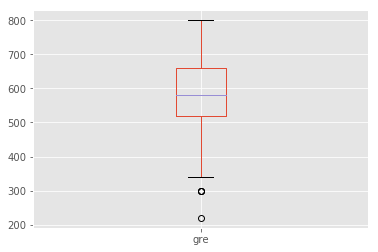

In [31]:
# TODO
df_no_na.boxplot(column='gre', grid=True, figsize=None, layout= None, return_type=None)

In [37]:
df_no_na.gre.quantile([.25, .75])

0.25    520.0
0.75    660.0
Name: gre, dtype: float64

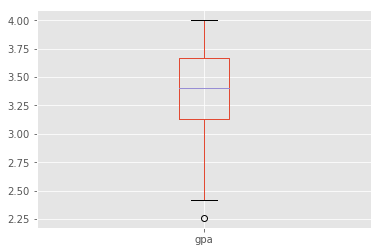

In [33]:
# TODO
df_no_na.boxplot(column='gpa', grid=True, figsize=None, layout=None, return_type=None)

In [38]:
df_no_na.gpa.quantile([.25, .75])

0.25    3.13
0.75    3.67
Name: gpa, dtype: float64

> ### Question 7.  What do boxplots show?

Answer: TODO

Boxplots show how data distributed in terms of quantile. 

> ### Question 8.  Plot the distribution of each variable.

In [63]:
type(2.400)

float

In [64]:
df_no_na.prestige > 2.5

0       True
1       True
2      False
3       True
4       True
       ...  
395    False
396     True
397    False
398    False
399     True
Name: prestige, dtype: bool

In [7]:
df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [15]:
df_high_pres = df[(df.admit == 1) & (df.prestige > 2.5)]

df_high_pres

,admit,gre,gpa,prestige
1,1,660.0,3.67,3.0
3,1,640.0,3.19,4.0
8,1,540.0,3.39,3.0
27,1,520.0,3.74,4.0
33,1,800.0,4.00,3.0
...,...,...,...,...
352,1,580.0,3.12,3.0
358,1,560.0,3.69,3.0
371,1,680.0,3.76,3.0
392,1,600.0,3.38,3.0


In [ ]:
df

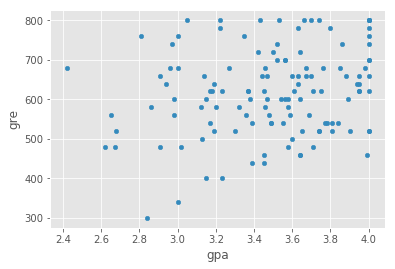

In [51]:
# TODO

df_admitted.plot.scatter(x = 'gpa', y = 'gre', s=None, c=None)

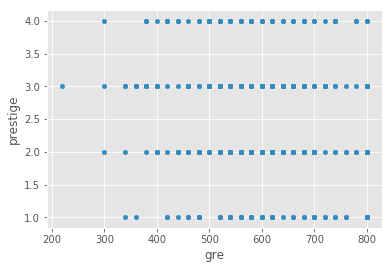

In [45]:
# TODO
df_no_na.plot.scatter(x = 'gre', y = 'prestige')

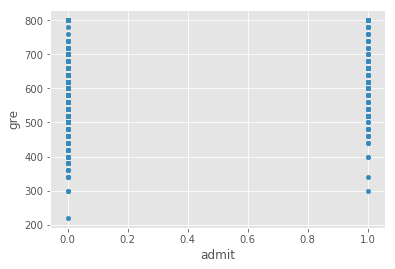

In [46]:
# TODO
df_no_na.plot.scatter(x = 'admit', y = 'gre')

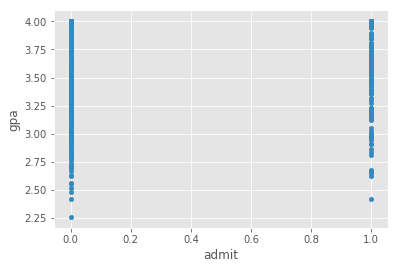

In [87]:
# TODO
df_no_na.plot.scatter(x = 'admit', y = 'gpa')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

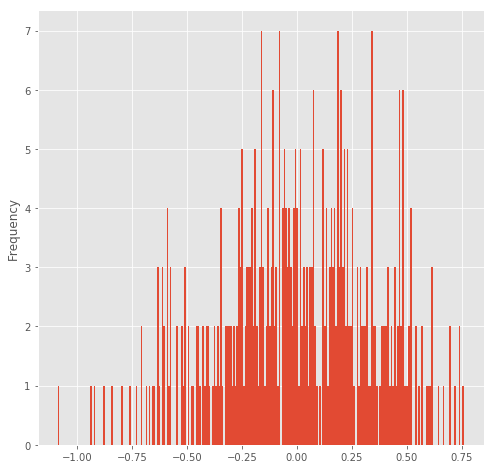

In [81]:
# TODO

model = smf.ols(formula = 'gpa ~ gre', data = df_no_na).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

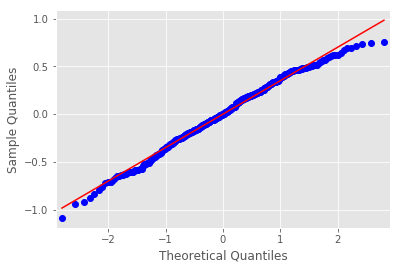

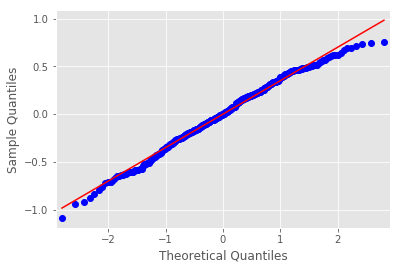

In [82]:
sm.qqplot(model.resid, line = 's')

Answer: TODO

The Quantile-Quantile plot graph indicates that the gre and gpa scores are 

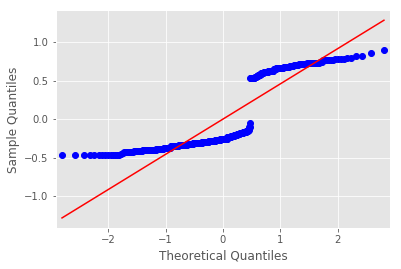

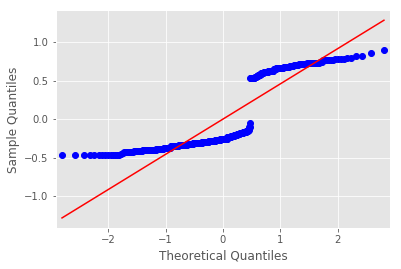

In [93]:
model = smf.ols(formula = 'admit ~ gre', data = df_no_na).fit()

sm.qqplot(model.resid, line = 's')

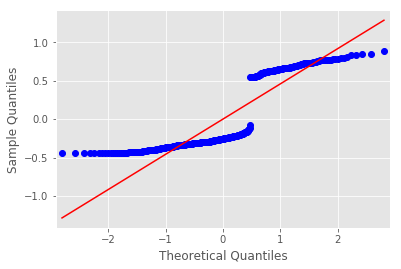

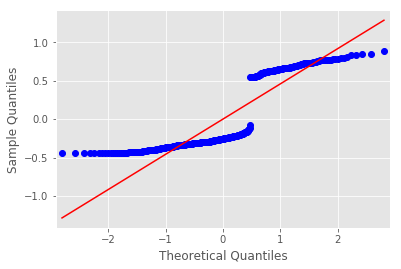

In [94]:
model = smf.ols(formula = 'admit ~ gpa', data = df_no_na).fit()

sm.qqplot(model.resid, line = 's')

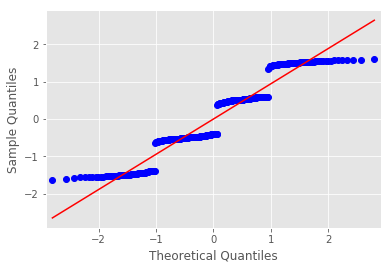

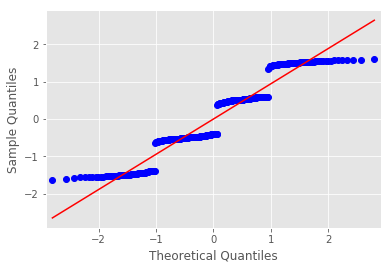

In [95]:
model = smf.ols(formula = 'prestige ~ gpa', data = df_no_na).fit()

sm.qqplot(model.resid, line = 's')

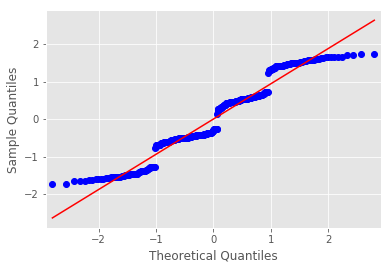

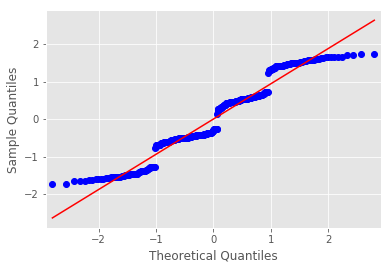

In [96]:
model = smf.ols(formula = 'prestige ~ gre', data = df_no_na).fit()

sm.qqplot(model.resid, line = 's')

> ### Question 10.  Create a correlation matrix for the dataset.

In [80]:
# TODO

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Sun, 14 May 2017   Prob (F-statistic):           2.84e-15
Time:                        12:05:53   Log-Likelihood:                -147.52
No. Observations:                 397   AIC:                             299.0
Df Residuals:                     395   BIC:                             307.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6536      0.092     28.996      0.000         2.474     2.834
gre            0.0013      0.000      8.225      0.000         0.001     0.002
==============================================================================
Omnibus:                        6.571   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.116
Skew:                          -0.251   Prob(JB):                       0.0470
Kurtosis:                       2.656   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: TODO

It seems that the gre scores and the gpa scores are potentially colinear. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: TODO

It makes common sense that the gre scores and the gps scores are correlated, as they both measure the academic performance of a student. 


__Prestige Exploring Analysis:

The prestige of the undergraduate schools where a student comes from could only explain the student's academic performance prior to being admitted by their undergraduate schools. 
 - High prestige rating scores indicate the students study very hard and got good grades prior to being admitted by the undergraduate school
 - Low prestige rating scores, on the other hand, indicate the students study very hard and got good grades prior to being admitted by the undergraduate school

The prestige could also influence the gpa of a student, as gpa scores are usually given to students by using curved grading methods. 

Students in low prestige undergraduate schools could potentially get higher gpa scores easier than students in high prestige undergraduate schools, as the overall academic competition in low prestige undergraduate schools could be less intense. 

A student's gre score should be independent of the prestige of his/her undergradute schools, as all students should take the same standard GRE exam.



__Admit rate Exploring Analysis:

One can imagine that the admit rating should be corelated to a student's gre, gpa, and/or prestige, which are the indicators of the overall wellbeing (maining in terms of academic performance) of the student. 

We could assume that high scores a student have in all 3 indicators (gre, gpa, and prestige) should increase the possibility that the student is admitted by UCLA. 


__Observation: 

The gre and gpa are corelated, and have a colinear relationship. 
The gpa and prestige could be potentially corelated. 
The gre and prestige could be potentially independent. 
The possibility to be admited by UCLA could be potentially corelated with all 3 indicators, gre, gpa, and prestige. 



> ### Question 13.  What is your hypothesis?

Answer: TODO

Null Hypothese: The possibility to be admited by UCLA __is not__ corelated with all 3 indicators, gre, gpa, and prestige. 

Challenge: How to figure ou the "possibility" to be admited by UCLA? 

The admit rate in the dataset is nominal (category). 